In [1]:
import pickle
import pandas as pd
import os
import glob
from IPython.display import display
import matplotlib.pyplot as plt

Reading the files with Market Iterations: These are for multiple auctions in one run


In [2]:
def read_pickle_file(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

In [3]:
# Directing to the path where the results are stored adn read all the pickle files (Market 0 to end market), extracting the market times
# and storing the data in a list of dictionaries. The list is then converted to a DataFrame for easier visualization.
current_dir = os.getcwd()
parent_folder = os.path.abspath(os.path.join(current_dir, ".."))
folder_path = os.path.join(
    parent_folder,
    "results",
    "modified_bidbudget_toulouse_case3_withC_cap5_withReturn_3_highcap_fisher_b-50.0_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250204_111131",
    "results"
)


fisher_files = sorted(glob.glob(os.path.join(folder_path, "fisher_data_*.pkl")))
fisher_after_files = sorted(glob.glob(os.path.join(folder_path, "fisher_data_after_*.pkl")))

# Extract the market auction time from filenames
def extract_time(filename):
    return int(filename.split("_")[-1].split(".")[0])  # Extracts the number from fisher_data_X.pkl


fisher_data_list = []
after_fisher_data_list = []

# Iterate over paired files
for fisher_file, fisher_after_file in zip(fisher_files, fisher_after_files):
    fisher_data = read_pickle_file(fisher_file)
    end_of_market_data = read_pickle_file(fisher_after_file)

    if fisher_data is None or end_of_market_data is None:
        continue  # Skip if reading failed

    market_time = extract_time(fisher_file)

    # Extract necessary data from Fisher Market (Before Transactions)
    prices = fisher_data["prices"]
    goods_list = fisher_data["goods_list"]

    # Extract necessary data from End of Market (After Transactions)
    market_data = end_of_market_data["market_data"]
    agents_data = end_of_market_data["agents_data"]

    # Extract market-level data
    end_capacities = market_data["capacity"]
    initial_capacities = market_data["original_capacity"]
    end_prices = market_data["prices"]  # Prices after transactions (if they change)

    print(f"\n🔎 Processing Market Time: {market_time}")
    print(f"  📌 Found {len(fisher_data['desired_goods'])} agents")

    for agent, agent_data in fisher_data["desired_goods"].items():
        desired_indx = agent_data['desired_transit_edges_idx'][0]  # Directly access

        try:
            # Data before transactions (Fisher Market)
            fisher_data_list.append({
                "Market_Time": market_time,
                "Agent": agent,
                "Edge_Index": desired_indx,
                "Price": prices[desired_indx],  # Price before transaction
                "Initial_Capacity": initial_capacities[desired_indx],  # Starting capacity
                "Good": goods_list[desired_indx][1],
                "Data_Type": "Fisher"
            })

            # Extract agent-specific information after the market transaction
            agent_final_allocation = agents_data[agent].get("final_allocation", {})
            agent_payment = agents_data[agent].get("payment", 0)
            agent_valuation = agents_data[agent].get("valuation", {})

            # Data after transactions (After Fisher Market)
            after_fisher_data_list.append({
                "Market_Time": market_time,
                "Agent": agent,
                "Edge_Index": desired_indx,
                "Price": end_prices[desired_indx],  # Final price after auction
                "End_Capacity": end_capacities[desired_indx],  # Capacity after auction
                "Good": goods_list[desired_indx][1],
                "Final_Goods_allocated": agents_data[agent]["agent_goods_list"],  # Final goods allocated
                "Final_goods_vector": agent_final_allocation,
                "Payment": agent_payment,
                "Data_Type": "After_Fisher"
            })
        except KeyError as e:
            print(f"    ❌ Skipping {agent}: Key {e} not found in dataset!")

# Create DataFrames
df_fisher = pd.DataFrame(fisher_data_list)
df_after_fisher = pd.DataFrame(after_fisher_data_list)

# ## uncomment below if you want to see the entire dataframe
# # pd.set_option('display.max_rows', None)  # Show all rows
# # pd.set_option('display.max_columns', None)  # Show all columns
# # pd.set_option('display.width', 1000)  # Adjust width to prevent line breaks
# # pd.set_option('display.max_colwidth', None)  # Prevent column truncation
# # display(df)




🔎 Processing Market Time: 0
  📌 Found 23 agents

🔎 Processing Market Time: 100
  📌 Found 15 agents

🔎 Processing Market Time: 120
  📌 Found 14 agents

🔎 Processing Market Time: 140
  📌 Found 23 agents

🔎 Processing Market Time: 160
  📌 Found 24 agents

🔎 Processing Market Time: 180
  📌 Found 25 agents

🔎 Processing Market Time: 20
  📌 Found 15 agents

🔎 Processing Market Time: 200
  📌 Found 33 agents

🔎 Processing Market Time: 220
  📌 Found 28 agents

🔎 Processing Market Time: 240
  📌 Found 21 agents

🔎 Processing Market Time: 260
  📌 Found 18 agents

🔎 Processing Market Time: 280
  📌 Found 18 agents

🔎 Processing Market Time: 40
  📌 Found 19 agents

🔎 Processing Market Time: 60
  📌 Found 11 agents

🔎 Processing Market Time: 80
  📌 Found 21 agents


In [4]:
# Display high-level structure of data
print("📊 Summary of Fisher Market Data Structure:")
print("High-level data from End of Market:", list(end_of_market_data.keys()))
print("High-level data from Fisher Market:", list(fisher_data.keys()))

# DataFrame summaries
print("\n🗂 Fisher Market Data Overview:")
display(df_fisher.info())
display(df_fisher.sample(10))

print("\n🗂 After Fisher Market Data Overview:")
display(df_after_fisher.info())
display(df_after_fisher.sample(10))


📊 Summary of Fisher Market Data Structure:
High-level data from End of Market: ['market_data', 'agents_data', 'ranked_list', 'valuations']
High-level data from Fisher Market: ['x_prob', 'prices', 'rebates', 'agent_constraints', 'adjusted_budgets', 'desired_goods', 'goods_list', 'capacity', 'data_to_plot', 'agent_goods_lists']

🗂 Fisher Market Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Market_Time       308 non-null    int64  
 1   Agent             308 non-null    object 
 2   Edge_Index        308 non-null    int64  
 3   Price             308 non-null    float64
 4   Initial_Capacity  308 non-null    float64
 5   Good              308 non-null    object 
 6   Data_Type         308 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 17.0+ KB


None

,Market_Time,Agent,Edge_Index,Price,Initial_Capacity,Good,Data_Type
239,280,AC004,84,0.000000e+00,2.0,S007_206,Fisher
26,100,AC011,410,3.599445e-07,2.0,S009_34,Fisher
32,100,AC065,856,6.280156e-08,2.0,S009_149,Fisher
196,220,AC087,1936,2.614856e-06,2.0,S0010_255,Fisher
261,40,AC026,392,0.000000e+00,2.0,S006_71,Fisher
93,160,AC052,1698,0.000000e+00,2.0,S009_177,Fisher
205,240,AC031,562,0.000000e+00,2.0,S008_141,Fisher
247,280,AC098,991,0.000000e+00,2.0,S0011_46,Fisher
105,180,AC010,913,0.000000e+00,1.0,S008_69,Fisher
126,20,AC168,299,0.000000e+00,2.0,S0011_48,Fisher



🗂 After Fisher Market Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Market_Time            308 non-null    int64  
 1   Agent                  308 non-null    object 
 2   Edge_Index             308 non-null    int64  
 3   Price                  308 non-null    float64
 4   End_Capacity           308 non-null    float64
 5   Good                   308 non-null    object 
 6   Final_Goods_allocated  308 non-null    object 
 7   Final_goods_vector     308 non-null    object 
 8   Payment                308 non-null    float64
 9   Data_Type              308 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 24.2+ KB


None

,Market_Time,Agent,Edge_Index,Price,End_Capacity,Good,Final_Goods_allocated,Final_goods_vector,Payment,Data_Type
201,240,AC010,185,0.000000e+00,2.0,S008_69,"[(V002_240, V002_241), (V002_241, V002_242), (...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,After_Fisher
162,200,AC071,1981,0.000000e+00,1.0,S006_249,"[(V001_209, V001_210), (V001_210, V001_211), (...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",215.181966,After_Fisher
154,200,AC018,132,0.000000e+00,1.0,S007_240,"[(V002_204, V002_205), (V002_205, V002_206), (...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",131.617630,After_Fisher
83,160,AC031,877,0.000000e+00,2.0,S008_141,"[(V002_160, V002_161), (V002_161, V002_162), (...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,After_Fisher
195,220,AC061,1890,2.614856e-06,1.0,S0012_249,"[(V004_227, V004_228), (V004_228, V004_229), (...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000232,After_Fisher
23,100,AC009,73,6.280154e-08,1.0,S0011_132,"[(V004_111, V004_112), (V004_112, V004_113), (...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000116,After_Fisher
252,280,AC148,1341,0.000000e+00,2.0,S0010_216,"[(V003_280, V003_281), (V003_281, V003_282), (...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,After_Fisher
173,220,AC010,185,0.000000e+00,1.0,S008_69,"[(V002_220, V002_221), (V002_221, V002_222), (...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,After_Fisher
306,80,AC165,953,0.000000e+00,1.0,S0010_107,"[(V003_88, V003_89), (V003_89, V003_90), (V003...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",36.960921,After_Fisher
208,240,AC048,925,0.000000e+00,2.0,S0012_79,"[(V004_240, V004_241), (V004_241, V004_242), (...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,After_Fisher


In [8]:
# Ensure Market_Time is an integer for proper sorting
df_fisher['Market_Time'] = df_fisher['Market_Time'].astype(int)

# Split "Good" into "Sector" and "Request_Time"
df_fisher[['Sector', 'Request_Time']] = df_fisher['Good'].str.split('_', expand=True)

# Convert Request_Time to integer
df_fisher['Request_Time'] = df_fisher['Request_Time'].astype(int)

# Group by Sector, Request_Time, and Market_Time while counting the number of agents
sector_request_counts = (
    df_fisher.groupby(['Sector', 'Request_Time', 'Market_Time'])['Agent']
    .count()
    .reset_index()
    .rename(columns={'Agent': 'Num_Agents'})
)

# Sort the DataFrame by Market_Time (ascending), Request_Time, and Sector (both descending)
sector_request_counts_sorted = sector_request_counts.sort_values(
    by=["Market_Time", "Request_Time", "Sector"], ascending=[True, True, True]
)

# Display DataFrame
pd.set_option('display.max_rows', None)
display(sector_request_counts_sorted)



,Sector,Request_Time,Market_Time,Num_Agents
201,S008,1,0,1
80,S0012,2,0,1
112,S005,2,0,1
113,S005,3,0,1
250,S009,3,0,1
202,S008,12,0,1
203,S008,13,0,1
141,S006,15,0,1
39,S0011,16,0,1
204,S008,18,0,1


## Plot Performance Data

In [20]:
current_dir = os.getcwd()
parent_folder = os.path.abspath(os.path.join(current_dir, ".."))

file_list = [
    "modified_bidbudget_toulouse_case3_withC_cap4_withReturn_fisher_b-50.0_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250208_181043",
    "modified_bidbudget_toulouse_case3_withC_cap5_withReturn_fisher_b-50.0_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250208_154902",
    "modified_bidbudget_toulouse_case3_withC_cap6_withReturn_fisher_b-50.0_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250208_145420"
]


df_list = []

for file in file_list:
    folder_path = os.path.join(parent_folder, "results", file, "results")
    csv_file_path = os.path.join(folder_path, 'market_performance_table.csv')
    
    try:
        df_csv = pd.read_csv(csv_file_path)
        df_csv["File"] = file  # column to track file origin
        capacity = int(file.split('_cap')[1].split('_')[0])
        df_csv["Capacity"] = capacity
        df_list.append(df_csv)
    except FileNotFoundError:
        print(f"File not found: {csv_file_path}")
    except pd.errors.EmptyDataError:
        print(f"File is empty: {csv_file_path}")

# Concatenate all DataFrames
pd.set_option('display.max_rows', None) 
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    # display(combined_df.head())
    display(combined_df)
else:
    print("No data was loaded.")

 

,Market_Auction_Start_Time,Number_Interations,Number_Agents,Num_Goods,Number_Contested_Routes,Run_Time,File,Capacity
0,0,270,23,1680,0,408.52686,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
1,20,300,18,1549,0,317.87410,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
2,40,300,21,1705,0,411.81862,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
3,60,300,15,1468,0,333.97128,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
4,80,300,27,2199,0,517.92098,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
5,100,300,22,1688,0,391.16176,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
6,120,300,22,1758,0,371.63049,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
7,140,300,32,2456,0,703.70803,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
8,160,300,33,2532,0,637.68767,modified_bidbudget_toulouse_case3_withC_cap4_w...,4
9,180,300,35,2694,0,896.65505,modified_bidbudget_toulouse_case3_withC_cap4_w...,4


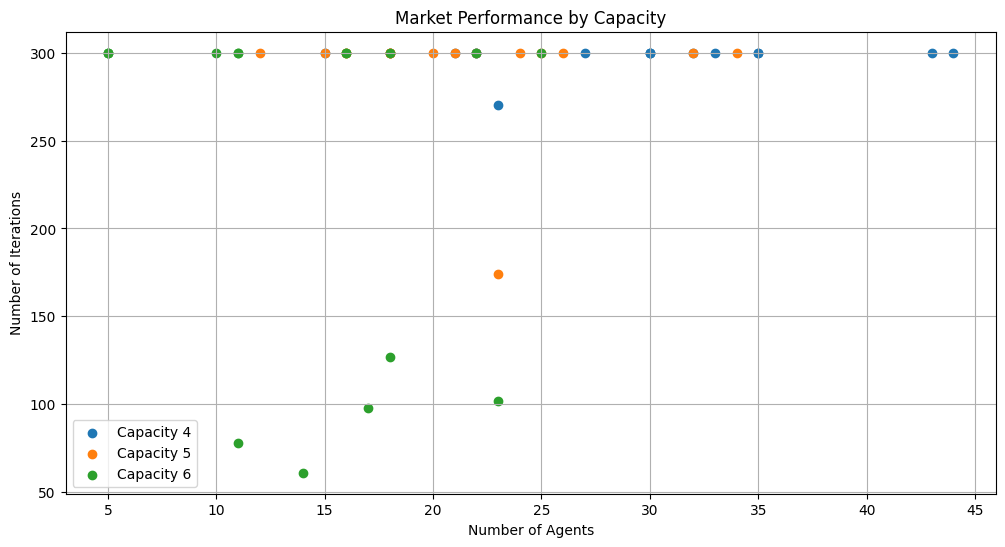

In [34]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.title("Market Performance by Capacity")
plt.ylabel("Number of Iterations")
plt.xlabel("Number of Agents")
plt.grid()
for capacity in combined_df["Capacity"].unique():
    subset = combined_df[combined_df["Capacity"] == capacity]
    plt.scatter(subset["Number_Agents"], subset["Number_Interations"], label=f"Capacity {capacity}", marker='o')

plt.legend()

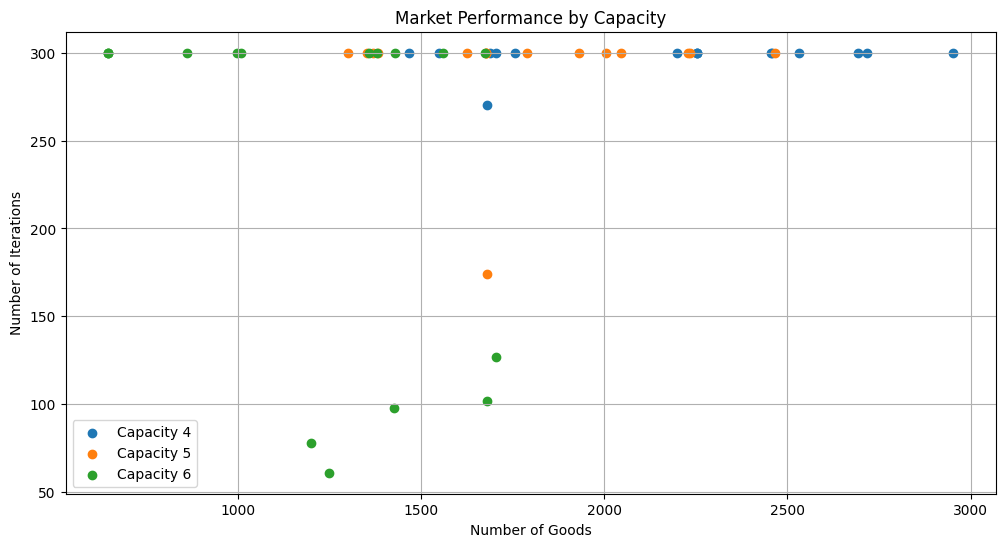

In [33]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.title("Market Performance by Capacity")
plt.ylabel("Number of Iterations")
plt.xlabel("Number of Goods")
plt.grid()
for capacity in combined_df["Capacity"].unique():
    subset = combined_df[combined_df["Capacity"] == capacity]
    plt.scatter(subset["Num_Goods"], subset["Number_Interations"], label=f"Capacity {capacity}", marker='o')

plt.legend()

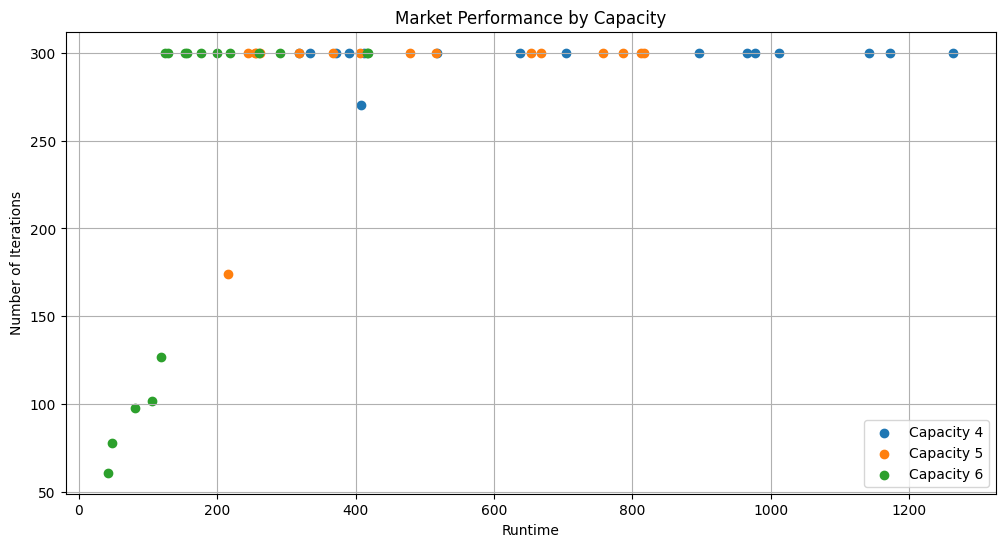

In [32]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.title("Market Performance by Capacity")
plt.ylabel("Number of Iterations")
plt.xlabel("Runtime (seconds)")
plt.grid()
for capacity in combined_df["Capacity"].unique():
    subset = combined_df[combined_df["Capacity"] == capacity]
    plt.scatter(subset["Run_Time"], subset["Number_Interations"], label=f"Capacity {capacity}", marker='o')
    # plt.plot(subset["Run_Time"], subset["Number_Interations"], label=f"Capacity {capacity}", marker='o')

plt.legend()

Reading the files with Market Iterations: These are for multiple files and a fixed auction time

In [13]:
current_dir = os.getcwd()
parent_folder = os.path.abspath(os.path.join(current_dir, ".."))

file_list = [
    "toulouse_case_cap4_updated_fisher_b-50.0_agents5_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250214_094310",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents6_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_103847",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents7_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_103947",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents8_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_104044",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents9_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_104230",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents10_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250214_094549",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents11_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_104712",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents12_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_105524",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents13_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_110417",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents14_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_111839",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents15_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250214_100800",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents16_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_113033",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents17_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_114352",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents18_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_115829",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents19_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_121327",
    "toulouse_case_cap4_updated_fisher_b-50.0_agents20_dval40.0_outval1.0_pout1.0_freq30.0_pbound3000.0_receding_20250216_122848",
]


df_list = []

for file in file_list:
    folder_path = os.path.join(parent_folder, "results", file, "results")
    csv_file_path = os.path.join(folder_path, 'market_performance_table.csv')
    
    try:
        df_csv = pd.read_csv(csv_file_path)
        df_csv["File"] = file  # column to track file origin
        n_agents = int(file.split('_agents')[1].split('_')[0])
        df_list.append(df_csv)
    except FileNotFoundError:
        print(f"File not found: {csv_file_path}")
    except pd.errors.EmptyDataError:
        print(f"File is empty: {csv_file_path}")

# Concatenate all DataFrames
pd.set_option('display.max_rows', None) 
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    # display(combined_df.head())
    display(combined_df)
else:
    print("No data was loaded.")

,Market_Auction_Start_Time,Number_Interations,Number_Agents,Num_Goods,Number_Contested_Routes,Run_Time,File
0,0,10,5,581,0,3.70678,toulouse_case_cap4_updated_fisher_b-50.0_agent...
1,20,10,5,561,0,3.52404,toulouse_case_cap4_updated_fisher_b-50.0_agent...
2,40,16,5,772,0,5.69767,toulouse_case_cap4_updated_fisher_b-50.0_agent...
3,60,10,5,466,0,3.18313,toulouse_case_cap4_updated_fisher_b-50.0_agent...
4,80,10,5,562,2,3.88141,toulouse_case_cap4_updated_fisher_b-50.0_agent...
5,100,62,5,514,4,20.64275,toulouse_case_cap4_updated_fisher_b-50.0_agent...
6,120,10,5,638,3,3.77607,toulouse_case_cap4_updated_fisher_b-50.0_agent...
7,140,10,5,535,0,3.28440,toulouse_case_cap4_updated_fisher_b-50.0_agent...
8,160,10,5,734,0,3.95300,toulouse_case_cap4_updated_fisher_b-50.0_agent...
9,180,10,5,718,0,4.16777,toulouse_case_cap4_updated_fisher_b-50.0_agent...


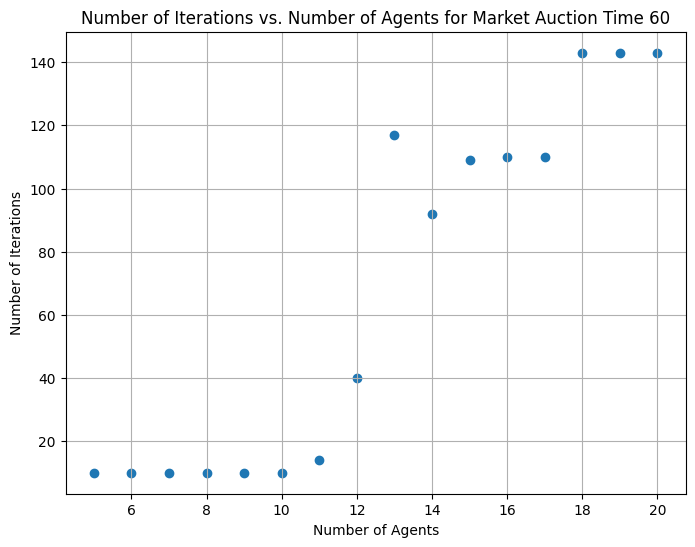

In [15]:
filtered_df = combined_df[combined_df["Market_Auction_Start_Time"] == 60]

# Plotting
plt.figure(figsize=(8, 6))
plt.title("Number of Iterations vs. Number of Agents for Market Auction Time 60")
plt.xlabel("Number of Agents")
plt.ylabel("Number of Iterations")
plt.grid(True)

plt.scatter(filtered_df["Number_Agents"], filtered_df["Number_Interations"], marker='o')

# plt.legend()
plt.show()

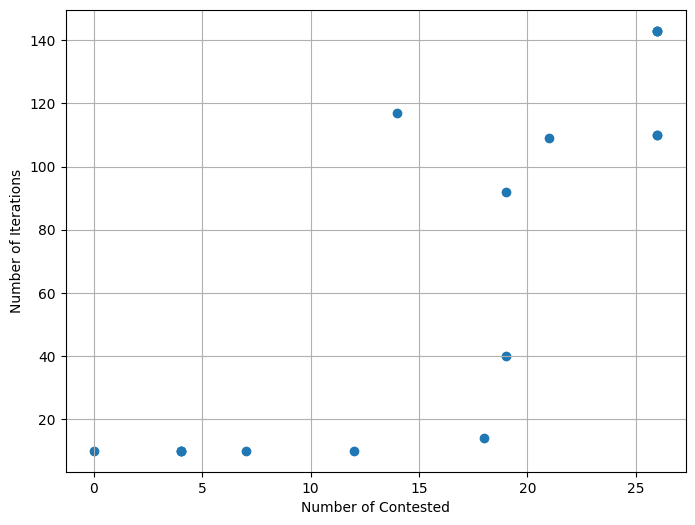

In [17]:
num_iter_row = combined_df[combined_df["Market_Auction_Start_Time"] == 60]
# this is because we save the number of contested goods after the market runs
num_consted_good_row = combined_df[combined_df["Market_Auction_Start_Time"] == 40]
# Plotting
plt.figure(figsize=(8, 6))
# plt.title("Number of Iterations vs. Number of Agents for Market Auction Time 60")
plt.xlabel("Number of Contested")
plt.ylabel("Number of Iterations")
plt.grid(True)

plt.scatter(num_consted_good_row["Number_Contested_Routes"], num_iter_row["Number_Interations"], marker='o')

# plt.legend()
plt.show()